

---


# Detect If there is car in image:
---



In [ ]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.inception_v3 import InceptionV3
from keras.applications.xception import Xception
from keras.applications.imagenet_utils import preprocess_input,decode_predictions
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.utils.data_utils import get_file

In [ ]:
import json
from IPython.display import Image, display, clear_output

In [ ]:
CLASS_INDEX = None
CLASS_INDEX_PATH = 'https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json'

In [ ]:
img=load_img('/content/drive/MyDrive/car-damage-detection-using-CNN/data/data_car/1.jpg',target_size=(224,224))
import numpy as np
#convert image into numpy array:-
x= img_to_array(img)
x

array([[[143., 142., 124.],
        [143., 142., 124.],
        [144., 143., 125.],
        ...,
        [ 39.,  39.,  41.],
        [ 30.,  33.,  38.],
        [ 36.,  34.,  37.]],

       [[143., 142., 124.],
        [143., 142., 124.],
        [144., 143., 125.],
        ...,
        [ 30.,  28.,  31.],
        [ 28.,  31.,  36.],
        [ 25.,  26.,  28.]],

       [[143., 142., 124.],
        [143., 142., 124.],
        [144., 143., 125.],
        ...,
        [ 22.,  16.,  20.],
        [ 18.,  23.,  27.],
        [ 20.,  26.,  26.]],

       ...,

       [[ 10.,  10.,   8.],
        [ 10.,  10.,   8.],
        [ 12.,  12.,  10.],
        ...,
        [161., 158., 141.],
        [140., 138., 117.],
        [166., 164., 141.]],

       [[ 11.,  11.,   9.],
        [ 13.,  13.,  11.],
        [ 12.,  12.,  10.],
        ...,
        [171., 168., 151.],
        [151., 149., 128.],
        [129., 127., 104.]],

       [[ 18.,  18.,  16.],
        [ 19.,  19.,  17.],
        [ 10.,  

In [ ]:
x= np.expand_dims(x,axis=0)
x= preprocess_input(x)
x

array([[[[ 2.0060997e+01,  2.5221001e+01,  1.9320000e+01],
         [ 2.0060997e+01,  2.5221001e+01,  1.9320000e+01],
         [ 2.1060997e+01,  2.6221001e+01,  2.0320000e+01],
         ...,
         [-6.2939003e+01, -7.7778999e+01, -8.4680000e+01],
         [-6.5939003e+01, -8.3778999e+01, -9.3680000e+01],
         [-6.6939003e+01, -8.2778999e+01, -8.7680000e+01]],

        [[ 2.0060997e+01,  2.5221001e+01,  1.9320000e+01],
         [ 2.0060997e+01,  2.5221001e+01,  1.9320000e+01],
         [ 2.1060997e+01,  2.6221001e+01,  2.0320000e+01],
         ...,
         [-7.2939003e+01, -8.8778999e+01, -9.3680000e+01],
         [-6.7939003e+01, -8.5778999e+01, -9.5680000e+01],
         [-7.5939003e+01, -9.0778999e+01, -9.8680000e+01]],

        [[ 2.0060997e+01,  2.5221001e+01,  1.9320000e+01],
         [ 2.0060997e+01,  2.5221001e+01,  1.9320000e+01],
         [ 2.1060997e+01,  2.6221001e+01,  2.0320000e+01],
         ...,
         [-8.3939003e+01, -1.0077900e+02, -1.0168000e+02],
         [

## Trying diffrent models

In [ ]:
vgg16 = VGG16(weights="imagenet")
preds1 = vgg16.predict(x)
print(decode_predictions(preds1))

49152/35363 [=========================================] - 0s 0us/step
[[('n03770679', 'minivan', 0.22047697), ('n03791053', 'motor_scooter', 0.1630053), ('n03769881', 'minibus', 0.109398596), ('n03100240', 'convertible', 0.08751662), ('n03930630', 'pickup', 0.07750512)]]


Based on imagenet dataset it is identifying object in the image with corresponding predictions.

In [ ]:
vgg19 = VGG19(weights="imagenet")
preds2 = vgg19.predict(x)
print(decode_predictions(preds2))

574726144/574710816 [==============================] - 4s 0us/step
[[('n03770679', 'minivan', 0.1510297), ('n03769881', 'minibus', 0.12034445), ('n03459775', 'grille', 0.11639149), ('n03100240', 'convertible', 0.09690147), ('n03930630', 'pickup', 0.079654716)]]


In [ ]:
resnet = ResNet50(weights="imagenet")
preds3 = resnet.predict(x)
print(decode_predictions(preds3))

102981632/102967424 [==============================] - 1s 0us/step
[[('n03770679', 'minivan', 0.55633193), ('n03769881', 'minibus', 0.08211165), ('n03930630', 'pickup', 0.07963628), ('n03100240', 'convertible', 0.07159228), ('n02814533', 'beach_wagon', 0.058371432)]]


In [ ]:
print(CLASS_INDEX)

None


In [ ]:
def get_predictions(preds, top=5):  # get top 5 predictions
    global CLASS_INDEX
    if len(preds.shape) != 2 or preds.shape[1] != 1000:     #len(preds.shape)==(1,1000) 
        raise ValueError('`decode_predictions` expects a batch of predictions (i.e. a 2D array of shape (samples, 1000)). Found array with shape: ' + str(preds.shape))
    if CLASS_INDEX is None:     #if class index json file of imagenet dataset is not downloaded then:-
        fpath = get_file('imagenet_class_index.json',CLASS_INDEX_PATH,cache_subdir='models')
        CLASS_INDEX = json.load(open(fpath))
    results = []
    for pred in preds:
        top_indices = pred.argsort()[-top:][::-1] # getting only 5 top prediction values out of the things predicted
        result = [tuple(CLASS_INDEX[str(i)]) + (pred[i],) for i in top_indices]   #store the class index of predicted object with its prediction.
        result.sort(key=lambda x: x[2], reverse=True) #sorting in dec order the results acc to its prediction value.
        results.append(result)     # Store the tuple in list
        #print("results predictions:-",results)
    return results

After checking accuracy for various models on imagenet dataset, accuracy of VGG16 is better than all other models so further the model will be trained on VGG16.

In [ ]:
## Using vgg16 model
from collections import defaultdict
def get_car_categories():
    d = defaultdict(float)
    img_list = os.listdir('/content/drive/MyDrive/car-damage-detection-using-CNN/data/data_car')  #locate the directory where images to train are present
    #print(img_list)
    for i, img_path in enumerate(img_list):   #i==index of image, img_path== name of image
        img = prepare_image('/content/drive/MyDrive/car-damage-detection-using-CNN/data/data_car/'+img_path)    #converting image into array
        out = vgg16.predict(img)  
        preds = get_predictions(out,top=5)    #get top 5 predictions of the corresponding image
        print(preds)
        for pred in preds[0]:
            # print(pred[0:2],pred[2])
            d[pred[0:2]]+=pred[2]
            print(d[pred[0:2]],'and',pred[2])     #added the corresponding prediction value of object to the dict
            # it is putting the prediction value corresponding to tuple (class_index, object detected ):predicted value
        if(i%5==0):
            print(i,'/',len(img_list),'complete') #to check the status of images processed
    return Counter(d)

In [ ]:
from collections import Counter
import os
def prepare_image(img_path):    #convert img into array
    img = load_img(img_path, target_size=(224, 224))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x
categ_count= get_car_categories() #save the dict 
with open('vgg16_cat_list.pk', 'wb') as f:
    pk.dump(categ_count, f, -1)

with open('vgg16_cat_list.pk', 'rb') as f:
    categ_count = pk.load(f)

[[('n03127747', 'crash_helmet', 0.65442747), ('n04285008', 'sports_car', 0.12522838), ('n03770679', 'minivan', 0.044619925), ('n03100240', 'convertible', 0.042587794), ('n03791053', 'motor_scooter', 0.032574475)]]
0.6544274687767029 and 0.65442747
0.1252283751964569 and 0.12522838
0.04461992532014847 and 0.044619925
0.04258779436349869 and 0.042587794
0.032574474811553955 and 0.032574475
0 / 70 complete
[[('n03770679', 'minivan', 0.391138), ('n03459775', 'grille', 0.24529321), ('n03100240', 'convertible', 0.069466405), ('n02814533', 'beach_wagon', 0.04438999), ('n03670208', 'limousine', 0.042797133)]]
0.43575791269540787 and 0.391138
0.24529321491718292 and 0.24529321
0.11205419898033142 and 0.069466405
0.0443899892270565 and 0.04438999
0.04279713332653046 and 0.042797133
[[('n03891332', 'parking_meter', 0.36416855), ('n03770679', 'minivan', 0.086788304), ('n04517823', 'vacuum', 0.071729556), ('n03902125', 'pay-phone', 0.037233643), ('n04049303', 'rain_barrel', 0.035871502)]]
0.3641685

NameError: ignored

In [ ]:
def is_a_car(image,categ_list):
    img= prepare_image(image) #convert test image into array

    out = vgg16.predict(img)    #using vgg16 on image
    preds = get_predictions(out, top=5) #get top 5 predictions of objects present in image
    print("Identifying...")
    for pred in preds[0]: 
        if pred[0:2] in categ_list: #if top predictions of test image are present in categ_list that we defined above it means the
                                    # image has object that is also present in training data, so we can predict the image also consist similiar object as the traning data.
                                    #as we have training data for car objects so there is high chance that given image will also contains a car.

            #print(pred[0:2])
            return pred[0:2]
    return "The entered image is a not a car. "

In [ ]:
val_dir=os.listdir('/content/drive/MyDrive/car damage detection/val')
d2 = defaultdict(float)
for i, img_path in enumerate(val_dir):   #i==index of image, img_path== name of image
    if img_path.split('.')[1]=='jpg':
        img = prepare_image('/content/drive/MyDrive/car damage detection/val/'+img_path)    #converting image into array
        out = vgg16.predict(img)  
        vals = get_predictions(out,top=5)    #get top 5 predictions of the corresponding image
        #print(preds)
        for val in vals[0]:
            # print(pred[0:2],pred[2])
            d2[val[0:2]]+=val[2]
            #print(d2[pred[0:2]],'and',pred[2])     #added the corresponding prediction value of object to the dict
            # it is putting the prediction value corresponding to tuple (class_index, object detected ):predicted value
        if(i%5==0):
            print(i,'/',len(val_dir),'complete') #to check the status of images processed
print(d2)




5 / 13 complete
10 / 13 complete
defaultdict(<class 'float'>, {('n04285008', 'sports_car'): 0.28732500597834587, ('n03670208', 'limousine'): 0.31140902638435364, ('n03770679', 'minivan'): 2.5227093622088432, ('n03459775', 'grille'): 0.1967792958021164, ('n02930766', 'cab'): 0.2594778835773468, ('n02814533', 'beach_wagon'): 1.7395514845848083, ('n03930630', 'pickup'): 0.4083494246006012, ('n04461696', 'tow_truck'): 0.042850591242313385, ('n03384352', 'forklift'): 0.07824457436800003, ('n03594945', 'jeep'): 0.20937171578407288, ('n02965783', 'car_mirror'): 0.4001608043909073, ('n03777568', 'Model_T'): 0.06062106415629387, ('n03791053', 'motor_scooter'): 0.32192666828632355, ('n03769881', 'minibus'): 0.17570072412490845, ('n03100240', 'convertible'): 0.5977804362773895, ('n03445924', 'golfcart'): 0.0857568308711052, ('n02974003', 'car_wheel'): 0.24914273247122765})


In [ ]:
is_a_car('/content/drive/MyDrive/data1a/training/01-whole/0002.jpg',categ_count)

Identifying...
('n03977966', 'police_van')


'Picture given is a car'

In [ ]:
is_a_car('/content/drive/MyDrive/data1a/training/01-whole/0002.jpg',categ_count) 

Identifying...
('n03977966', 'police_van')


'Picture given is a car'

In [ ]:
is_a_car('/content/drive/MyDrive/data1a/training/01-whole/0006.jpg',categ_count) 

Identifying...
('n02814533', 'beach_wagon')


'Picture given is a car'

In [ ]:
is_a_car('/content/6185.jpg',categ_list)

Identifying...


'The entered image is a not a car. '

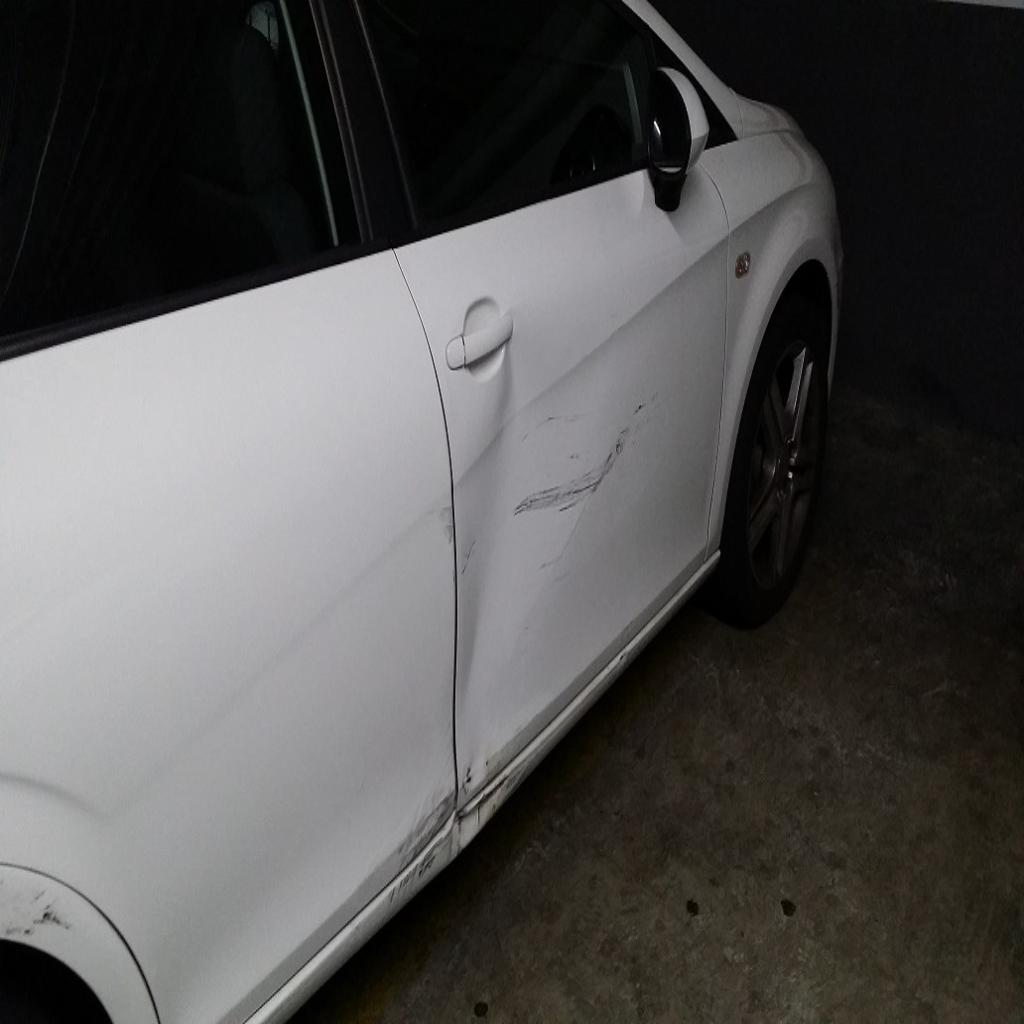

In [ ]:
Image('/content/6185.jpg')